In [1]:
import os
from statistics import mean
import pandas as pd
from matplotlib import pyplot as plt

r100k = pd.read_csv('../../../data/ratings100k.csv').drop('Unnamed: 0', 1)
print(r100k[:10])
r70k = pd.read_csv('../../../data/ratings70k.csv').drop('Unnamed: 0', 1)
files = listOfFile = os.listdir('../../../data/sessions/')

                                 userId  \
0  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
1  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
2  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
3  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
4  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
5  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
6  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
7  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
8  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
9  d50f84c0-17cd-11ea-bd9f-33d41a12d743   

                                        uri  isItem  sentiment  
0  http://www.wikidata.org/entity/Q19347291    True          1  
1   http://www.wikidata.org/entity/Q1342372   False          1  
2    http://www.wikidata.org/entity/Q105801    True          1  
3    http://www.wikidata.org/entity/Q191104   False          1  
4    http://www.wikidata.org/entity/Q471839   False          1  
5   http://www.wikidata.org/entity/Q2484376   False          1  
6    http://www.wikidata.org/entity/Q858724    True          1  
7     

90056
89105
41200
45542


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


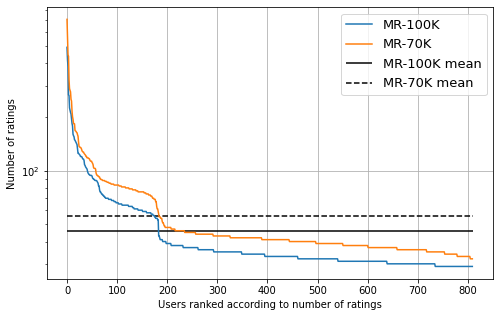

In [2]:
def remove_rating(dfs, rating):
    return [df[df['sentiment'] != rating] for df in dfs]

def get_counts(df):
    return df[['userId', 'uri']].groupby('userId').count().uri
print(len(r100k))
print(len(r70k))
r100k, r70k = remove_rating([r100k, r70k], 0)
print(len(r100k))
print(len(r70k))
c100k = get_counts(r100k)
c70k = get_counts(r70k)

c100k = sorted([c for c in c100k], reverse=True)
c70k = sorted([c for c in c70k], reverse=True)

l100k = len(c100k)
l70k = len(c70k)

length = min(l100k, l70k) - 10
fig, axes = plt.subplots(figsize=(8, 5))

plt.plot(list(range(length)),c100k[:length], label='MR-100K')
plt.plot(list(range(length)), c70k[:length], label='MR-70K')
plt.hlines(mean(c100k[:length]), 0, length, label='MR-100K mean')
plt.hlines(mean(c70k[:length]), 0, length, linestyles='dashed', label='MR-70K mean')

plt.yscale('log')
# plt.ylim(top=100)
font = {'family' : 'normal',
        'size'   : 13}

plt.rc('font', **font)
plt.style.use('seaborn-deep')
plt.grid()
plt.legend()
plt.xlabel('Users ranked according to number of ratings')
plt.ylabel('Number of ratings')
plt.savefig('../results/output/num_ratings.pdf', bbox_inches='tight')
plt.show()